Open 'DB Browser For SQLite', import the CSV files 'Crime_Data_2017_1.csv' and 'Moon_Fraction_Illumination_2017_two_column.csv'. Combine them using the SQL Query below. (Don't close this program. You're gonna need it for the rest of this session)

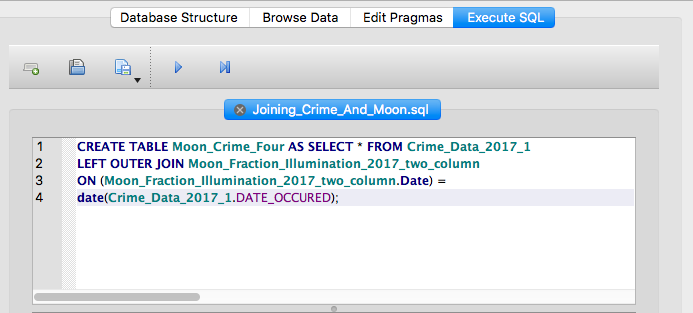

In [51]:
from IPython.display import Image

Image("SQL_Query_Pic_1.png")

Go back into the "Database Structure" part, select that newly made table and then select "File > Export > Table(s) as CSV..." When prompted to, press "OK". You won't need to worry about the set-up details all that much for this session.

In [58]:
## Importing the dependencies that'll be necessary for doing work in Jupyter Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
output_notebook()

Loading BokehJS ...

Now to get that csv file I made earlier.

In [59]:
crime_fullness_df=pd.read_csv('Moon_Crime_Four.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
## Previewing the data. Wanna drop the NAN values with "dropna()". 
##Limiting how much of the table that'll be seen to the head of the document

crime_fullness_df.dropna().head()

INCIDENT_NUMBER        DATE_REPORTED         DATE_OCCURED  \
2    80-16-111438  2017-01-01 11:32:51  2017-01-01 09:16:51   
3    80-16-111465  2017-01-01 16:20:16  2017-01-01 15:55:16   
4    80-16-111481  2017-01-01 18:38:13  2017-01-01 13:34:13   
5    80-17-000012  2017-01-01 00:44:00  2017-01-01 00:44:00   
6    80-17-000010  2017-01-01 01:30:00  2017-01-01 00:50:00   

                                   UOR_DESC           CRIME_TYPE NIBRS_CODE  \
2    TBUT OR DISP AUTO > $500 BUT < $10,000  MOTOR VEHICLE THEFT        240   
3    TBUT OR DISP AUTO > $500 BUT < $10,000  MOTOR VEHICLE THEFT        240   
4    TBUT OR DISP AUTO > $500 BUT < $10,000  MOTOR VEHICLE THEFT        240   
5                      ASSAULT - 1ST DEGREE              ASSAULT        13A   
6  ASSAULT - 4TH DEGREE (NO VISIBLE INJURY)              ASSAULT        13B   

  UCR_HIERARCHY   ATT_COMP LMPD_DIVISION LMPD_BEAT            PREMISE_TYPE  \
2        PART I  COMPLETED  2ND DIVISION       211       CONVENIENCE STORE   
3        PART I  COMPLETED  4TH DIVISION       435            LIQUOR STORE   
4        PART I  COMPLETED  2ND DIVISION       211  HIGHWAY / ROAD / ALLEY   
5        PART I  COMPLETED  2ND DIVISION       223        RESIDENCE / HOME   
6       PART II  COMPLETED  3RD DIVISION       322        BAR / NIGHT CLUB   

              BLOCK_ADDRESS        CITY ZIP_CODE       ID        Date  \
2   S 38TH ST / W MARKET ST  LOUISVILLE    40212  1027637  2017-01-01   
3    4400 BLOCK MANSLICK RD  LOUISVILLE    40216  1027639  2017-01-01   
4   S 43RD ST / W MARKET ST  LOUISVILLE    40212  1027641  2017-01-01   
5     1600 BLOCK WILSON AVE  LOUISVILLE    40210  1027643  2017-01-01   
6  200 BLOCK EVANGELINE AVE  LOUISVILLE    40214  1027644  2017-01-01   

   PercentageofIllumination  
2                      0.08  
3                      0.08  
4                      0.08  
5                      0.08  
6                      0.08

In [61]:
##  Querying the NIBRS_CODE for homicide/non-neglient manslaughter (09A), 
##negligent manslaughter (09B), rape (11A) (11B) (11C), robbery (120), aggravated assault ('13A'), 
##which are the four types of criminal activity that used to determine violent crime numbers

crime_fullness_df.dropna().loc[crime_fullness_df['NIBRS_CODE'].isin(['09A', '09B', '11A', '11B', '13A', '120'])]

INCIDENT_NUMBER        DATE_REPORTED         DATE_OCCURED  \
5        80-17-000012  2017-01-01 00:44:00  2017-01-01 00:44:00   
7        80-17-000019  2017-01-01 00:30:00  2017-01-01 00:20:00   
27       80-17-000026  2017-01-01 01:47:00  2017-01-01 00:00:00   
30       80-17-000063  2017-01-01 05:22:00  2017-01-01 05:10:00   
31       80-17-000064  2017-01-01 04:53:00  2017-01-01 02:45:00   
34       80-17-000072  2017-01-01 07:44:00  2017-01-01 06:30:00   
46       80-17-000055  2017-01-01 04:20:00  2017-01-01 04:20:00   
62       80-17-000076  2017-01-01 08:00:00  2017-01-01 06:00:00   
176      80-17-000409  2017-01-02 14:12:00  2017-01-02 14:05:00   
192      80-17-000199  2017-01-01 19:23:00  2017-01-01 19:23:00   
235      80-17-008041  2017-01-27 16:50:00  2017-01-27 16:40:00   
287      80-17-000496  2017-01-02 17:22:00  2017-01-01 02:35:00   
288      80-17-000526  2017-01-02 19:11:00  2017-01-02 18:34:00   
293      80-17-000543  2017-01-02 19:40:00  2017-01-02 19:25:00   
333      80-17-012112  2017-02-11 02:02:00  2017-02-11 01:50:00   
334      80-17-012060  2017-02-10 21:14:00  2017-02-10 20:34:00   
335      80-17-012123  2017-02-11 03:17:00  2017-02-11 03:12:00   
339      80-17-012014  2017-02-10 23:30:00  2017-02-10 17:47:00   
348      80-17-012230  2017-02-11 14:30:00  2017-02-11 14:30:00   
350      80-17-012218  2017-02-11 14:01:00  2017-02-11 13:50:00   
355      80-17-012291  2017-02-11 19:30:00  2017-02-11 19:01:00   
358      80-17-012369  2017-02-12 04:29:00  2017-02-12 04:04:00   
499      80-17-000457  2017-01-02 15:14:00  2017-01-02 15:14:00   
507      80-17-000004  2017-01-01 00:25:00  2017-01-01 00:02:00   
566      80-17-008141  2017-01-27 23:28:00  2017-01-27 22:30:00   
569      80-17-008162  2017-01-28 01:41:00  2017-01-28 01:00:00   
570      80-17-008173  2017-01-28 04:06:00  2017-01-28 04:01:00   
571      80-17-008177  2017-01-28 04:52:00  2017-01-28 04:50:00   
574      80-17-008188  2017-01-28 08:37:00  2017-01-28 01:30:00   
646      80-17-012531  2017-02-12 19:00:00  2017-02-12 18:54:00   
...               ...                  ...                  ...   
81433    80-17-060837  2017-07-27 19:17:00  2017-07-27 19:17:00   
81489    80-17-061962  2017-07-31 17:51:00  2017-07-31 17:51:00   
81490    80-17-061962  2017-07-31 17:51:00  2017-07-31 17:51:00   
81491    80-17-061962  2017-07-31 17:51:00  2017-07-31 17:51:00   
81492    80-17-061962  2017-07-31 17:51:00  2017-07-31 17:51:00   
81496    80-17-063085  2017-08-04 09:31:00  2017-08-04 01:00:00   
81502    80-17-062385  2017-08-02 00:50:00  2017-08-02 00:50:00   
81506    80-17-061693  2017-07-30 18:56:00  2017-07-30 18:56:00   
81520    80-17-063166  2017-08-04 14:58:00  2017-08-04 14:35:00   
81555    80-17-009189  2017-02-01 10:18:00  2017-02-01 10:18:00   
81593    80-17-061349  2017-07-29 11:05:00  2017-07-29 11:05:00   
81614    80-17-062240  2017-08-01 15:24:00  2017-08-01 15:10:00   
81645    80-17-063420  2017-08-05 14:10:00  2017-08-05 01:00:00   
81652    80-17-063551  2017-08-05 23:59:00  2017-08-05 23:45:00   
81659    80-17-063530  2017-08-05 22:47:00  2017-08-05 22:47:00   
81661    80-17-063128  2017-08-04 13:15:00  2017-08-04 11:30:00   
81670    80-17-063704  2017-08-06 16:41:00  2017-08-05 04:45:00   
81675    80-17-063768  2017-08-06 21:23:00  2017-08-06 21:15:00   
81677    80-17-063100  2017-08-04 09:59:00  2017-08-04 09:40:00   
81697    80-17-063236  2017-08-04 19:20:00  2017-08-04 18:45:00   
81726    80-17-063658  2017-08-06 14:06:00  2017-08-06 13:30:00   
81735    80-17-063378  2017-08-05 12:09:00  2017-08-05 11:00:00   
81737    80-17-063389  2017-08-05 13:10:00  2017-08-05 12:20:00   
81740    80-17-063416  2017-08-05 13:57:00  2017-08-05 13:00:00   
81741    80-17-063397  2017-08-05 13:23:00  2017-08-05 13:20:00   
81755    80-17-063607  2017-08-06 08:58:00  2017-08-06 08:30:00   
81757    80-17-063581  2017-08-06 04:36:00  2017-08-06 04:36:00   
81773    80-17-063796  2017-08-07 03:17:00  2017-08-0

Going back into 'DB Browser' and run the SQL query pictured below

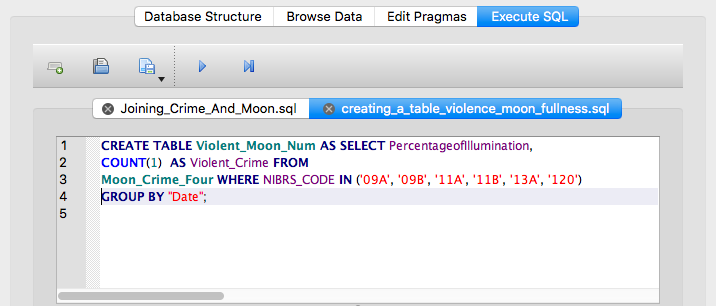

In [62]:
Image("SQL_Query_Pic_4.png")

Once again, go back into the "Database Structure" part, select that newly made table and then select "File > Export > Table(s) as CSV..."


In [63]:
##Now let's get some more precise numbers. Let's make those seperate instances of violent crime count as one.
##Then compare them to moon fullness. Gonna use that via that csv I exported

crime_fullness_df=pd.read_csv('Violent_Moon_Num.csv')

In [64]:
## Previewing the data. Wanna drop the NAN values with "dropna()"

crime_fullness_df.dropna().sort_values(by='Violent_Crime', ascending=False)

PercentageofIllumination  Violent_Crime
270                      0.42             22
260                      0.11             22
168                      0.53             22
166                      0.73             22
309                      0.98             22
1                        0.08             20
280                      0.97             20
21                       0.38             20
35                       0.50             19
136                      0.77             19
133                      0.95             18
131                      1.00             18
84                       0.10             18
217                      0.94             18
91                       0.22             18
106                      0.79             18
264                      0.01             18
100                      0.99             18
332                      0.65             18
11                       0.98             17
62                       0.25             17
199                      0.34             17
155                      0.76             17
203                      0.02             17
308                      1.00             17
2                        0.15             17
87                       0.00             17
238                      0.21             17
154                      0.67             17
251                      0.96             17
..                        ...            ...
200                      0.24              6
220                      1.00              6
198                      0.46              6
321                      0.02              6
287                      0.32              6
291                      0.03              6
52                       0.28              5
177                      0.06              5
356                      0.13              5
293                      0.00              5
55                       0.07              5
19                       0.57              5
54                       0.13              5
256                      0.51              5
363                      0.79              5
335                      0.91              5
208                      0.18              5
344                      0.51              5
228                      0.37              5
364                      0.88              5
193                      0.91              5
72                       1.00              4
330                      0.45              4
365                      0.94              4
354                      0.03              4
194                      0.85              4
230                      0.17              4
320                      0.05              3
64                       0.47              2
334                      0.84              2

[365 rows x 2 columns]

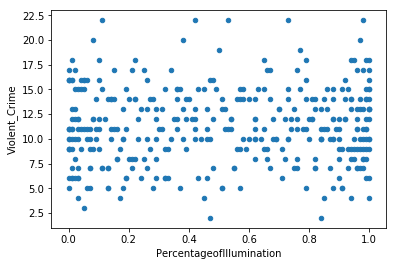

In [65]:
##Using matplotlib to to create a scatter plot

c_f=crime_fullness_df.plot.scatter(x='PercentageofIllumination', y='Violent_Crime')
plt.show(c_f)

Huh...that scatter looks a little weird, though I'm doubting the possibility of a significant pattern. Gonna us Bokeh.JS to get a larger illustration. Maybe that'll help.

In [66]:
##Gotta tell Bokeh where to get the info it's gonna chart at

source = ColumnDataSource(crime_fullness_df)

In [67]:
p = figure(title='Moon Fullness And Violent Crime', plot_width=650, plot_height=650)
p.circle('PercentageofIllumination', 'Violent_Crime', fill_color="white", size=7, source=source)
plt.show(p)

In [68]:
crime_fullness_df['PercentageofIllumination'].corr(crime_fullness_df['Violent_Crime'])

0.044767441225061565

Guess there's no correlation between fullness of the moon and violent crime. Kinda reassuring, I guess.

One of the mentors, Evan Payne, was curious about whether the fullness of the moon would have an effect on car break-ins, he (more or less) said that when the moon is full, there's just enough light to help one see, but enough darkness to conceal oneself. I thought I'd add burglary, too. So back into 'DB Browser' go..doin' the same as above...

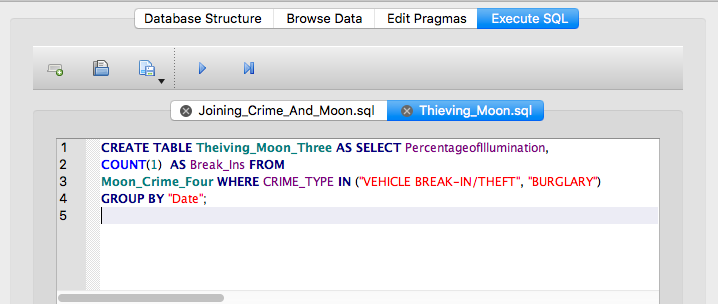

In [69]:
Image("SQL_Query_Pic_5.png")

In [70]:
##Import another csv file...

theif_fullness_df=pd.read_csv('Theiving_Moon_Three.csv')

In [71]:
## Previewing the data. Wanna drop the NAN values with "dropna()"

theif_fullness_df.dropna().sort_values(by='Break_Ins', ascending=False)

PercentageofIllumination  Break_Ins
1                        0.08         58
10                       0.93         55
16                       0.84         55
210                      0.36         54
197                      0.57         54
2                        0.15         54
203                      0.02         53
13                       0.99         51
173                      0.06         50
195                      0.77         50
321                      0.02         49
159                      0.98         49
43                       0.98         49
228                      0.37         48
121                      0.29         47
37                       0.73         47
14                       0.96         46
160                      1.00         46
180                      0.32         46
322                      0.00         46
207                      0.10         46
108                      0.62         45
227                      0.48         44
201                      0.15         44
11                       0.98         44
326                      0.12         44
273                      0.70         44
167                      0.63         43
127                      0.88         43
124                      0.62         43
..                        ...        ...
28                       0.00         22
359                      0.38         21
360                      0.48         21
35                       0.50         21
82                       0.26         21
297                      0.18         21
4                        0.33         21
22                       0.29         21
71                       1.00         21
339                      0.96         20
233                      0.00         20
62                       0.25         20
313                      0.68         20
70                       0.98         20
73                       0.97         20
130                      0.99         20
49                       0.56         19
338                      0.99         19
57                       0.00         19
358                      0.29         18
283                      0.75         18
347                      0.22         17
320                      0.05         17
36                       0.62         17
362                      0.69         17
364                      0.88         17
154                      0.67         16
363                      0.79         15
67                       0.79         14
365                      0.94          9

[365 rows x 2 columns]

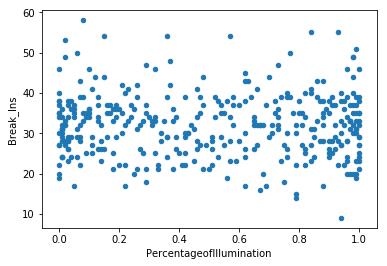

In [72]:
t_f=theif_fullness_df.plot.scatter(x='PercentageofIllumination', y='Break_Ins')
plt.show(t_f)

In [73]:
theif_fullness_df['PercentageofIllumination'].corr(theif_fullness_df['Break_Ins'])

-0.02868174979748295

Guess their's no correlation between car break-ins/burglary and the fullness of the moon either.